# Analytics Vidhya Competition
## Data Science Hackathon
## Feburary 2018


***

### Problem Statement

Country Beeristan, a high potential market, accounts for nearly 10% of Stallion & Co.’s global beer sales. Stallion & Co. has a large portfolio of products distributed to retailers through wholesalers (agencies). There are thousands of unique wholesaler-SKU/products combinations. In order to plan its production and distribution as well as help wholesalers with their planning, it is important for Stallion & Co. to have an accurate estimate of demand at SKU level for each wholesaler.

Currently demand is estimated by sales executives, who generally have a “feel” for the market and predict the net effect of forces of supply, demand and other external factors based on past experience. The more experienced a sales exec is in a particular market, the better a job he does at estimating. Joshua, the new Head of S&OP for Stallion & Co. just took an analytics course and realized he can do the forecasts in a much more effective way. He approaches you, the best data scientist at Stallion, to transform the exercise of demand forecasting.

### Datasets

You are provided with the following data:

- price_sales_promotion.csv: (\$/hectoliter) Holds the price, sales & promotion in dollar value per hectoliter at Agency-SKU-month level
- historical_volume.csv: \(hectoliters\) Holds sales data at Agency-SKU-month level from Jan 2013 to Dec 2017
- weather.csv: (Degree Celsius) Holds average maximum temperature at Agency-month level
- industry_soda_sales.csv: (hectoliters) Holds industry level soda sales
- event_calendar.csv: Holds event details (sports, carnivals, etc.)
- industry_volume.csv: (hectoliters) Holds industry actual beer volume
- demographics.csv: Holds demographic details (Yearly income in $)

### Submission Formats

1. Volume_forecast.csv: You need to first forecast the demand volume for Jan’18 of all agency-SKU combination.
1. sku_recommendation.csv: Secondly, you need to suggest 2 SKUs which can be sold by Agency06 & Agency14. These two agencies are new and company wants to find out which two products would be the best products for these two agencies.

Summarize the analysis carried out in a one pager mentioning the techniques used for forecasting and the approach to arrive at the suggested SKUs for Agency06 & Agency14.

### Evaluation Metrics

**Forecasting Score:** Forecast accuracy will be calculated using the following formula:

![forcasting formula](images/final_eqn_abinbev1-e1519195839730.jpg)

**Recommendation Score:** It is based on exact match with correct sku set (Actual SKU set). Score would be:

- 1 if both the recommeded SKUs are among the correct skus
- 0.5 if only one sku is among the correct skus
- 0 if no sku is among the correct skus

#### Public and Private Score:

* For Forecasting, public and private split is 20:80 on agency level i.e. 12 agencies are in public and 46 agencies are in private.
* Public leaderboard score is based on forecast accuracy only which is evaluated on the public part of the test file
* Private Leaderboard Score has 3 components:
    * Private Score = 0.70 * (forecast accuracy on the private) + 0.15 * (Recommendation Score for Agency_06) + 0.15 * (Recommendation Score for Agency_14)
    * Final standing on the leaderboard is based on private score only

***

# Solution

In [6]:
"""
Created on 24 Feb, 2018

@author: Aamir
"""

'\nCreated on 24 Feb, 2018\n\n@author: Aamir\n'

### 1. Import Libraries

In [9]:
import scipy.io
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

## 2. Import and select relevant data 
### Get training datasets

In [17]:
### Loading training images
psp = pd.read_csv('datasets/train/price_sales_promotion.csv')
pd.read_csv('datasets/train/historical_volume.csv')

,Agency,SKU,YearMonth,Volume
0,Agency_22,SKU_01,201301,52.272000
1,Agency_22,SKU_02,201301,110.700000
2,Agency_58,SKU_23,201301,0.000000
3,Agency_48,SKU_07,201301,28.320000
4,Agency_22,SKU_05,201301,238.538700
5,Agency_58,SKU_17,201301,0.000000
6,Agency_31,SKU_01,201301,126.360000
7,Agency_48,SKU_02,201301,475.790396
8,Agency_40,SKU_04,201301,1.150200
9,Agency_48,SKU_05,201301,1823.525772


In [8]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2013-07-01 00:00:00 to 2017-06-23 23:00:00
Data columns (total 7 columns):
ID                         26496 non-null int64
temperature                26496 non-null float64
var1                       26496 non-null float64
pressure                   26496 non-null float64
windspeed                  26496 non-null float64
var2                       26496 non-null object
electricity_consumption    26496 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.6+ MB


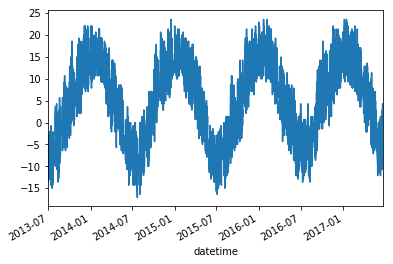

In [10]:
train.temperature.plot()

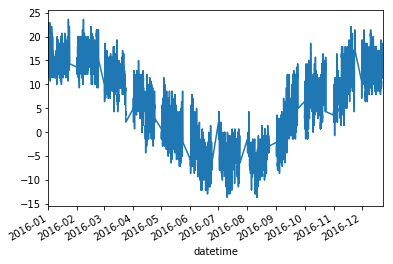

In [16]:
train.temperature['2016'].plot()

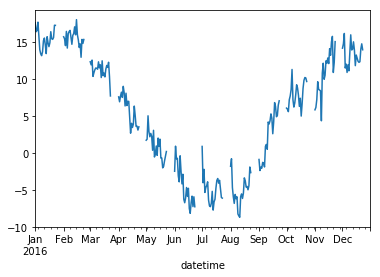

In [15]:
train.resample('D').mean()['temperature']['2016'].plot()

### Get test dataset

In [ ]:
test_imgs = glob2.glob(os.path.join('test1', '*.jpg'))

In [ ]:
# Load test images
for fl in test_imgs:
    img = cv2.imread(fl)
    resized = cv2.resize(img, (250,250), cv2.INTER_LINEAR)
    test_X.append(resized)

In [ ]:
len(test_X)

In [ ]:
#test_X = test_X[0:500]
test_X = np.array(test_X, dtype=np.uint8)
test_X = test_X.transpose((0, 3, 1, 2))
test_X = test_X.reshape(12500,187500)
test_X.shape

***
## 3. Train and Evaluate the Model

### Split Train/Test Sets

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((20000, 187500), (5000, 187500), (20000, 2), (5000, 2))

### Specify the model

In [27]:
# Specify the model
model = Sequential()
model.add(Dense(10, input_shape = (n_cols,), activation="relu", kernel_initializer="normal"))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

early_stopping_monitor = EarlyStopping(patience=2)

# Compile the model
sgd = SGD(lr=0.1)#, decay=1e-6, momentum=1.9)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model, batch_size=4, validation_split=0.3, callbacks=[early_stopping_monitor]
history = model.fit(X_train, y_train, epochs=5)


Epoch 1/5
20000/20000 [==============================] - 56s - loss: 0.0105 - acc: 0.4993    
Epoch 2/5
20000/20000 [==============================] - 60s - loss: 1.1921e-07 - acc: 0.4993    
Epoch 3/5
20000/20000 [==============================] - 63s - loss: 1.1921e-07 - acc: 0.4993    
Epoch 4/5
20000/20000 [==============================] - 68s - loss: 1.1921e-07 - acc: 0.4993    
Epoch 5/5
20000/20000 [==============================] - 66s - loss: 1.1921e-07 - acc: 0.4993    


### Train/Validation Set Evaluation 

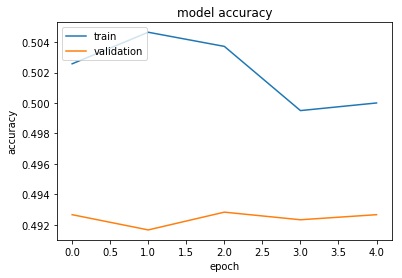

In [18]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

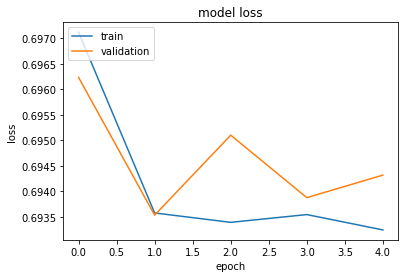

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Test Set Evaluation

In [20]:
# evaluate the model
pred = model.predict(test_X)
pred = np.exp(pred) - 1
pred[1]

array([ 1.45468307,  1.29977894], dtype=float32)

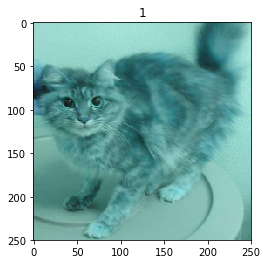

In [21]:
idx = 450
img = test_X[idx].reshape(3,250,250)
plt.imshow(img.transpose((1,2,0)))
plt.title(pred[idx][1].astype(int))

***
## 5. Predict the Test set

### Select test model features 

### Make predictions 

***
## 6. Save Results
### Create the Solution 

In [22]:
my_solution.index.name

NameError: name 'my_solution' is not defined

### Save to CSV file 

In [ ]:
my_solution.to_csv("my_solution_six.csv")

***
***
# Rough Work 

In [ ]:
%matplotlib inline